# Sistema de predicción del clima

# Nombres 
### Luisa Fernanda Cotte Sánchez; Cristian Giovanny Sánchez Pineda 

In [3]:
# dependecias para todo el taller. No se deben agregar más dependecias
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

Se cuenta con la información sobre el clima de los meses de enero a mayo del 2017. Se necesita generar la regresión que mejor se ajuste al comportamiento climático de dichos meses.

In [4]:
df = pd.read_csv('time_series.csv',  parse_dates=[0], header=None,index_col=0, squeeze=True,names=['fecha','unidades'])
t = df['2017-01-01':'2017-05-30']

1- Grafique el comportamiento climático almacenado en t (0.2).

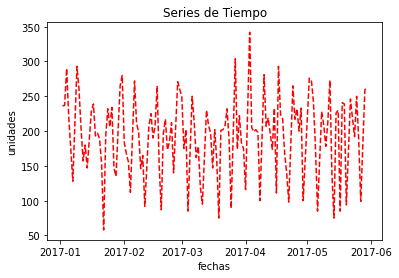

In [5]:
plt.plot(t, 'r--')
plt.ylabel('unidades')
plt.xlabel('fechas')
plt.title('Series de Tiempo')
plt.show()

2- Desarrolle una función con la cual se pueda generar phi con cualquiera de las tres funciones base (Polinomial, Exponencial y Sigmoildal). Para las funciones exponencial y sigmoidal genere los valores de la media con un $linspace$ entre 0 y 1 de tamaño $m$. Para la funcion exponencial use $s = 0.007$ y para la sigmoidal $s = 0.01$ (0.8).

In [15]:
def get_polinomial(x, i):
    return x**i

def get_exponential(x, miu):
    return np.exp((-(((x-miu)**2)/(2*(0.007)**2))))

def get_sigmoidal(x, miu):
    return 1/(1+np.exp(((x-miu)/(0.01))))

def polinomial(X, m, x):
    i_limit, j_limit = X.shape
    for i in range(i_limit):
        for j in range(j_limit):
            X[i][j] = get_polinomial(x[i], j)
            
def exponential(X, m, x):
    i_limit, j_limit = X.shape
    for i in range(i_limit):
        for j in range(j_limit):
            X[i][j]= get_exponential(x[i], m[j])
            
def sigmoidal(X, m, x):
    i_limit, j_limit = X.shape
    for i in range(i_limit):
        for j in range(j_limit):
            X[i][j] = get_sigmoidal(x[i], m[j])

def get_phi(fn, x, m):
    medium = np.linspace(0,1, len(t))
    X = np.zeros((len(x),m)) #Tamaño de t por m
    fn(X, medium, x)
    return X
x = [i for i in range(30)]
print(get_phi(polinomial,x, 3))

[[  1.   0.   0.]
 [  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]
 [  1.  11. 121.]
 [  1.  12. 144.]
 [  1.  13. 169.]
 [  1.  14. 196.]
 [  1.  15. 225.]
 [  1.  16. 256.]
 [  1.  17. 289.]
 [  1.  18. 324.]
 [  1.  19. 361.]
 [  1.  20. 400.]
 [  1.  21. 441.]
 [  1.  22. 484.]
 [  1.  23. 529.]
 [  1.  24. 576.]
 [  1.  25. 625.]
 [  1.  26. 676.]
 [  1.  27. 729.]
 [  1.  28. 784.]
 [  1.  29. 841.]]


3- Desarrolle dos funciones, una para generar W y otra para calcular el error medio cuadrático (0.5).

In [ ]:
def get_W()

4- Usando la función polinomial proponga y grafique con tres M diferentes regresiones que se adaptes a los datos climáticos de enero a mayo del 2017. Las tres propuestas deben mostrar el comportamiento entre t y t prima con adaptaciones claramente diferentes. Para los gráficos use subplots. Calcule el error medio cuadrático y muestre los valores M, E, Titulo (0.7). 

5- Usando la función exponencial proponga y grafique con tres M diferentes regresiones que se adaptes a los datos climáticos de enero a mayo del 2017. . Las tres propuestas deben mostrar el comportamiento entre t y t prima con adaptaciones claramente diferentes. Para los gráficos use subplots. Calcule el error medio cuadrático y muestre los valores de cada predicción en el titulo de la gráfica (0.7). 

6- Usando la función sigmoidal proponga y grafique con tres M diferentes regresiones que se adaptes a los datos climáticos de enero a mayo del 2017. . Las tres propuestas deben mostrar el comportamiento entre t y t prima con adaptaciones claramente diferentes. Para los gráficos use subplots. Calcule el error medio cuadrático y muestre los valores de cada predicción en el titulo de la gráfica (0.7). 

7- ¿Cual solución piensa que es la mejor que se ajusta al comportamiento climático? Justifique (0.6).

8- Realice la predicción del mes de junio del 2017 usando su mejor modelo encontrado en los puntos anteriores. Realice el grafico comparativo de su predicción con el valor real. Muestre en el gráfico solo la parte predecida (0.8).